In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv('D:/Users/NOEL SOARES/Desktop/Data Science/Credit_Score_Classification/Data/train.csv')

C:\Users\NOEL SOARES\AppData\Local\Temp\ipykernel_2284\131678508.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('D:/Users/NOEL SOARES/Desktop/Data Science/Credit_Score_Classification/Data/train.csv')


In [3]:
df=data.copy()

In [4]:
pd.set_option('display.max_columns',None)
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


### EDA

In [5]:
df.shape

(100000, 28)

In [6]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [7]:
#Dropping unecessary columns
df.drop(['ID', 'Month', 'Name', 'SSN', 'Type_of_Loan'],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [9]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [10]:
df.duplicated().value_counts()

False    100000
Name: count, dtype: int64

In [11]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [12]:
# df['Age'].unique()
#checking unique elements in the data
for i in df.columns:
    print('--'+i+'--')
    print(df[i].nunique())
    print(df[i].unique(),end='\n\n')

--Customer_ID--
12500
['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']

--Age--
1788
['23' '-500' '28_' ... '4808_' '2263' '1342']

--Occupation--
16
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

--Annual_Income--
18940
['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']

--Monthly_Inhand_Salary--
13235
[1824.84333333           nan 3037.98666667 ... 3097.00833333 1929.90666667
 3359.41583333]

--Num_Bank_Accounts--
943
[   3    2    1    7    4    0    8    5    6    9   10 1414 1231   67
  572 1488   91  528 1647 1696 1338  649  889 1668  685  857  975 1496
 1534 1620   37 1388 1429 1332 1588  120 1777 1096  803  494  744 1139
  831 1613  741  121  665 1748 1644  823 1356 1651   87  711  450  210
 1671 1722  648  672 1662 1495  510  666  429 1131 1434  980 1026  526
  718 1300 1312 1315  5

### repalcing unwanted values with nan in data

In [13]:
df['Occupation']=df['Occupation'].replace('_______',np.nan)
df['Occupation'].unique()

array(['Scientist', nan, 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [14]:
df['Credit_Mix']=df['Credit_Mix'].replace('_',np.nan)
df['Credit_Mix'].unique()

array([nan, 'Good', 'Standard', 'Bad'], dtype=object)

In [15]:
df['Payment_Behaviour']=df['Payment_Behaviour'].replace('!@9#%8',np.nan)
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', nan,
       'High_spent_Large_value_payments'], dtype=object)

### replacing unwanted data with nan

In [16]:
for k,i in enumerate(df['Credit_History_Age']):
#     print(i,j)
    if pd.isnull(i):
        df.loc[k, 'Credit_History_Age']=i
    else:
        df.loc[k, 'Credit_History_Age']=i.split()[0]

In [17]:
df['Credit_History_Age']=pd.to_numeric(df['Credit_History_Age'], errors='coerce')

In [18]:
df['Credit_History_Age'].unique()

array([22., nan, 26., 27., 17., 18., 30., 31., 32., 14., 15., 21., 19.,
       25.,  8.,  9., 16., 29.,  6.,  7., 10., 33., 12., 13., 28., 24.,
        1., 11., 20.,  0.,  5.,  2.,  3., 23.,  4.])

In [19]:
int(df['Age'][1])

23

In [20]:
for k,i in enumerate(df['Age']):
    i=i.replace('_','')
    if i.isdigit() or (i.startswith('-') and i[1:].isdigit()):
        i=int(i)
    if i>0 and i<100:
        df.loc[k, 'Age']=i
    else:
        df.loc[k,'Age']=np.nan
            
        
            
#         print(i)
# print(df['Age'])

In [21]:
df[['Age']]

,Age
0,23
1,23
2,NaN
3,23
4,23
...,...
99995,25
99996,25
99997,25
99998,25


In [22]:
df['Age'].unique()

array([23, nan, 28, 34, 54, 55, 21, 31, 33, 30, 24, 44, 45, 40, 41, 32,
       35, 36, 39, 37, 20, 46, 26, 42, 19, 48, 38, 43, 22, 16, 18, 15, 27,
       25, 14, 17, 47, 53, 56, 29, 49, 51, 50, 52, 99, 95], dtype=object)

In [23]:
df['Age']=df['Age'].astype("float64")

In [24]:
for k,i in enumerate(df['Annual_Income']):
    i=i.replace('_','')
    if i.isdigit() or (i.startswith('-') and i[1:].isdigit()):
        i=float(i)
    df.loc[k,'Annual_Income']=i

In [25]:
df['Annual_Income']=df['Annual_Income'].astype("float64")

In [26]:
for k,i in enumerate(df['Num_of_Loan']):
    i=i.replace('_','')
    if i.isdigit() or (i.startswith('-') and i[1:].isdigit()):
        i=float(i)
    df.loc[k,'Num_of_Loan']=i

In [27]:
df['Num_of_Loan']=df['Num_of_Loan'].astype("int")

In [28]:
for k,i in enumerate(df['Delay_from_due_date']):
    if i<0:
        df.loc[k, 'Delay_from_due_date']=np.nan
    else:
        df.loc[k,'Delay_from_due_date']=i

In [29]:
df['Delay_from_due_date']=df['Delay_from_due_date'].astype("float64")

In [30]:
for k,i in enumerate(df['Changed_Credit_Limit']):
    if isinstance(i,str):
        i=i.replace('_','')
        try:
            i=float(i)
        except ValueError:
            i=np.nan
    if isinstance(i,(int, float)):
        if i<0 or i=='':
            df.loc[k,'Changed_Credit_Limit']=np.nan
        else:
            df.loc[k,'Changed_Credit_Limit']=i

In [31]:
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].astype("float64")

In [32]:
# for k,i in enumerate(df['Credit_Mix']):
#     i=i.replace('_','')

In [33]:
df['Credit_Mix'].unique()

array([nan, 'Good', 'Standard', 'Bad'], dtype=object)

In [34]:
for k,i in enumerate(df['Outstanding_Debt']):
    if isinstance(i,str):
        i=i.replace('_','')
        try:
            i=float(i)
        except ValueError:
            i=np.nan
    if isinstance(i,(int, float)):
        if i<0 or i=='':
            df.loc[k,'Outstanding_Debt']=np.nan
        else:
            df.loc[k,'Outstanding_Debt']=i

In [35]:
df['Outstanding_Debt']=df['Outstanding_Debt'].astype("float64")

In [36]:
for k, i in enumerate(df['Payment_of_Min_Amount']):
    if isinstance(i, str) and i == 'NM':
        df.loc[k, 'Payment_of_Min_Amount'] = np.nan

In [37]:
df['Payment_of_Min_Amount'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [38]:
for k,i in enumerate(df['Amount_invested_monthly']):
    if isinstance(i,str):
        i=i.replace('_','')
    df.loc[k,'Amount_invested_monthly']=i

In [39]:
df['Amount_invested_monthly']=df['Amount_invested_monthly'].astype('float64')

In [40]:
df['Amount_invested_monthly'].dtypes

dtype('float64')

In [41]:
for k,i in enumerate(df['Monthly_Balance']):
    if isinstance(i,str):
        i=i.replace('_','')
    df.loc[k,'Monthly_Balance']=i

In [42]:
df['Monthly_Balance']=df['Monthly_Balance'].astype('float64')

In [43]:
df

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4,3.0,7,11.27,4.0,NaN,809.98,26.822620,22.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,23.0,Scientist,19114.12,NaN,3,4,3,4,NaN,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,CUS_0xd40,NaN,Scientist,19114.12,NaN,3,4,3,4,3.0,7,NaN,4.0,Good,809.98,28.609352,22.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,CUS_0xd40,23.0,Scientist,19114.12,NaN,3,4,3,4,5.0,4,6.27,4.0,Good,809.98,31.377862,22.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4,6.0,NaN,11.27,4.0,Good,809.98,24.797347,22.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,23.0,7,11.50,3.0,NaN,502.38,34.663572,31.0,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,CUS_0x942c,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,18.0,7,11.50,3.0,NaN,502.38,40.565631,31.0,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,CUS_0x942c,25.0,Mechanic,39628.99,3359.415833,4,6,5729,2,27.0,6,11.50,3.0,Good,502.38,41.255522,31.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,CUS_0x942c,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,20.0,NaN,11.50,3.0,Good,502.38,33.638208,31.0,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [44]:
for k,i in enumerate(df['Num_of_Delayed_Payment']):
    if isinstance(i,str):
        i=i.replace('_','')
        df.loc[k,'Num_of_Delayed_Payment']=i
    if isinstance(i,int) and i<0:
        df.loc[k,'Num_of_Delayed_Payment']=np.nan

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Age                       97223 non-null   float64
 2   Occupation                92938 non-null   object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       99409 non-null   float64
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      96323 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                79805 non-null   ob

In [46]:
df['Monthly_Inhand_Salary']=df.groupby(['Occupation'])['Monthly_Inhand_Salary'].transform(lambda x:x.fillna(x.mean()))
df['Monthly_Balance']=df.groupby(['Occupation'])['Monthly_Balance'].transform(lambda x:x.fillna(x.mean()))

In [47]:
df['Monthly_Inhand_Salary'].unique()

array([1824.84333333, 4267.13366717,           nan, ..., 3097.00833333,
       1929.90666667, 3359.41583333])

In [48]:
df[df['Monthly_Inhand_Salary'].isnull()]

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
8,CUS_0x21b1,28.0,NaN,34847.84,NaN,2,4,6,1,3.0,4,5.42,2.0,Good,605.03,24.464031,26.0,No,18.816215,104.291825,Low_spent_Small_value_payments,NaN,Standard
16,CUS_0x2dbc,34.0,NaN,143162.64,NaN,1,5,8,3,5.0,8,7.10,3.0,Good,1303.01,28.616735,17.0,No,246.992319,168.413703,NaN,NaN,Good
18,CUS_0x2dbc,34.0,NaN,143162.64,NaN,1,5,8,3,8.0,7,11.10,NaN,Good,1303.01,26.519815,17.0,No,246.992319,10000.000000,High_spent_Small_value_payments,NaN,Good
20,CUS_0x2dbc,34.0,NaN,143162.64,NaN,1,5,8,3,10.0,5,7.10,3.0,Good,1303.01,31.376150,18.0,No,246.992319,430.947528,Low_spent_Large_value_payments,NaN,Good
29,CUS_0xb891,55.0,NaN,30689.89,NaN,2,5,4,1,5.0,6,NaN,4.0,NaN,632.46,27.445422,17.0,No,16.415452,84.952848,High_spent_Small_value_payments,NaN,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99920,CUS_0x2654,37.0,NaN,139664.96,NaN,3,6,12,4,14.0,12,18.39,8.0,NaN,365.66,31.043048,29.0,Yes,423.731016,282.782346,High_spent_Large_value_payments,NaN,Standard
99935,CUS_0xb11c,38.0,NaN,15319.65,NaN,6,7,15,4,54.0,16,17.13,6.0,Bad,1453.61,34.557510,11.0,Yes,28.182033,191.877779,Low_spent_Small_value_payments,NaN,Poor
99937,CUS_0xad4f,NaN,NaN,22620.79,NaN,7,3,9,0,25.0,NaN,5.31,2.0,Standard,642.46,31.841872,NaN,No,0.000000,105.076293,Low_spent_Large_value_payments,NaN,Standard
99943,CUS_0xad4f,48.0,NaN,22620.79,NaN,6,2,9,0,27.0,15,5.31,2.0,NaN,642.46,34.026427,29.0,No,0.000000,205.217280,Low_spent_Small_value_payments,NaN,Poor


In [49]:
df.dropna(subset=['Occupation'],inplace=True)

In [50]:
df

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4,3.0,7,11.27,4.0,NaN,809.98,26.822620,22.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,23.0,Scientist,19114.12,4267.133667,3,4,3,4,NaN,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,CUS_0xd40,NaN,Scientist,19114.12,4267.133667,3,4,3,4,3.0,7,NaN,4.0,Good,809.98,28.609352,22.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,CUS_0xd40,23.0,Scientist,19114.12,4267.133667,3,4,3,4,5.0,4,6.27,4.0,Good,809.98,31.377862,22.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4,6.0,NaN,11.27,4.0,Good,809.98,24.797347,22.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,23.0,7,11.50,3.0,NaN,502.38,34.663572,31.0,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,CUS_0x942c,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,18.0,7,11.50,3.0,NaN,502.38,40.565631,31.0,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,CUS_0x942c,25.0,Mechanic,39628.99,3359.415833,4,6,5729,2,27.0,6,11.50,3.0,Good,502.38,41.255522,31.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,CUS_0x942c,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,20.0,NaN,11.50,3.0,Good,502.38,33.638208,31.0,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [51]:
df.isna().sum()

Customer_ID                     0
Age                          2588
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date           537
Num_of_Delayed_Payment       6492
Changed_Credit_Limit         3411
Num_Credit_Inquiries         1839
Credit_Mix                  18774
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8406
Payment_of_Min_Amount       11145
Total_EMI_per_month             0
Amount_invested_monthly      4160
Payment_Behaviour            7086
Monthly_Balance                 0
Credit_Score                    0
dtype: int64

In [52]:
df

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4,3.0,7,11.27,4.0,NaN,809.98,26.822620,22.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,23.0,Scientist,19114.12,4267.133667,3,4,3,4,NaN,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,CUS_0xd40,NaN,Scientist,19114.12,4267.133667,3,4,3,4,3.0,7,NaN,4.0,Good,809.98,28.609352,22.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,CUS_0xd40,23.0,Scientist,19114.12,4267.133667,3,4,3,4,5.0,4,6.27,4.0,Good,809.98,31.377862,22.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4,6.0,NaN,11.27,4.0,Good,809.98,24.797347,22.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,23.0,7,11.50,3.0,NaN,502.38,34.663572,31.0,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,CUS_0x942c,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,18.0,7,11.50,3.0,NaN,502.38,40.565631,31.0,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,CUS_0x942c,25.0,Mechanic,39628.99,3359.415833,4,6,5729,2,27.0,6,11.50,3.0,Good,502.38,41.255522,31.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,CUS_0x942c,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,20.0,NaN,11.50,3.0,Good,502.38,33.638208,31.0,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [53]:
df[df['Age'].isnull()]

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
2,CUS_0xd40,NaN,Scientist,19114.12,4267.133667,3,4,3,4,3.0,7,NaN,4.0,Good,809.98,28.609352,22.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
56,CUS_0x5407,NaN,Media_Manager,34081.38,4229.528763,8,7,15,3,30.0,11,17.13,5.0,Standard,1704.18,24.448063,NaN,NaN,70.478333,162.441009,Low_spent_Large_value_payments,298.192158,Poor
113,CUS_0xff4,NaN,Entrepreneur,25546.26,4235.833881,8,7,14,5,16.0,13,7.83,NaN,Standard,758.44,29.711376,18.0,Yes,101.328637,300.323232,Low_spent_Small_value_payments,129.933631,Standard
122,CUS_0x33d2,NaN,Scientist,31993.78,2942.148333,6,6,7,2,8.0,14,10.28,1.0,Standard,818.22,27.380109,17.0,Yes,45.141298,264.257089,Low_spent_Small_value_payments,274.816447,Standard
219,CUS_0x3edc,NaN,Accountant,43070.24,3622.186667,3,3,18,1,11.0,8,8.97,4.0,Standard,1233.10,24.331772,19.0,Yes,30.576085,74.920375,High_spent_Medium_value_payments,506.722207,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99908,CUS_0xa053,NaN,Writer,87695.34,7337.945000,2,7,7,0,5.0,10,6.52,6.0,Good,361.68,28.147193,19.0,No,65671.000000,168.798784,High_spent_Large_value_payments,804.995716,Standard
99913,CUS_0x1619,NaN,Media_Manager,20059.98,1523.665000,8,5,12,4,25.0,11,2.97,3.0,Good,909.01,25.982154,16.0,No,45.076827,74.713580,High_spent_Small_value_payments,292.576093,Poor
99950,CUS_0x51b3,NaN,Media_Manager,59146.36,4908.863333,3,6,6,1,8.0,6,6.68,5.0,NaN,418.03,38.199635,20.0,No,26.778419,502.376320,Low_spent_Small_value_payments,251.731594,Standard
99963,CUS_0x372c,NaN,Lawyer,42903.79,4135.320552,0,4,6,1,14.0,0,5.10,1.0,Good,1079.48,30.625298,NaN,No,34.975457,31.193919,High_spent_Large_value_payments,520.662207,Standard


In [54]:
df['New_Age']=df['Age'].transform(lambda x:x.fillna(x.mean()))

In [55]:
df['Delay_from_due_date']=df.groupby(['Occupation','Credit_Score'])['Delay_from_due_date'].transform(lambda x:x.fillna(x.mean()))

In [56]:
df

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,New_Age
0,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4,3.000000,7,11.27,4.0,NaN,809.98,26.822620,22.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,23.000000
1,CUS_0xd40,23.0,Scientist,19114.12,4267.133667,3,4,3,4,10.828755,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,23.000000
2,CUS_0xd40,NaN,Scientist,19114.12,4267.133667,3,4,3,4,3.000000,7,NaN,4.0,Good,809.98,28.609352,22.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,33.327139
3,CUS_0xd40,23.0,Scientist,19114.12,4267.133667,3,4,3,4,5.000000,4,6.27,4.0,Good,809.98,31.377862,22.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,23.000000
4,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4,6.000000,NaN,11.27,4.0,Good,809.98,24.797347,22.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,23.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,23.000000,7,11.50,3.0,NaN,502.38,34.663572,31.0,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor,25.000000
99996,CUS_0x942c,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,18.000000,7,11.50,3.0,NaN,502.38,40.565631,31.0,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor,25.000000
99997,CUS_0x942c,25.0,Mechanic,39628.99,3359.415833,4,6,5729,2,27.000000,6,11.50,3.0,Good,502.38,41.255522,31.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor,25.000000
99998,CUS_0x942c,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,20.000000,NaN,11.50,3.0,Good,502.38,33.638208,31.0,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard,25.000000


In [57]:
df['Credit_Score']=df.groupby(['Occupation'])['Credit_Score'].transform(lambda x:x.fillna(x.mode()))

In [58]:
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [59]:
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')

In [60]:
df['Num_of_Delayed_Payment']=df.groupby(['Credit_Score'])['Num_of_Delayed_Payment'].transform(lambda x:x.fillna(x.mean()))
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(int)

In [61]:
df['Num_of_Delayed_Payment'].unique()

array([   7,   26,    4,    8,    6,    1,   -1,    3,    0,    5,    9,
         31,   12,   15,   17,   10,    2,   11,   14,   20,   22,   32,
         13,   16,   18,   19,   23,   21,   24, 3318, 3083, 1338, 3104,
         25,  183, 1106,  834, 2672, 2008,   -3,  538,   -2, 3478, 2420,
        707,  708, 3815,   28,   27, 1867, 2250, 1463, 4126, 2882, 1941,
       2628,  132, 3069,  306, 3539, 3684, 1823, 4128, 1946,  827, 2297,
       2566,  904,  182,  929, 3568, 2503, 1552, 2812, 1697,  851, 3905,
        923,   88, 1668, 3253,  808, 2689, 3858,  642, 3457, 1402, 1732,
       3154,  847, 3037, 2204, 3103, 1063, 2056, 1282, 2569,  211,  793,
       3484,  411, 3491, 2072, 3050, 1049, 2162, 3402, 1718, 1014, 3260,
       3855,   84, 2311, 3251, 1832, 4069, 3010,  733, 4241,  166, 2461,
       1749, 3200,  663, 2185, 4161, 3009,  359, 2015, 1523,  594, 1199,
        186, 1015, 1989,  281,  559, 2165, 1509, 3545,  779,  192, 2323,
       1471, 1538, 3529, 3456, 3040, 2697, 3179, 13

In [62]:
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [63]:
df

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,New_Age
0,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4,3.000000,7,11.27,4.0,NaN,809.98,26.822620,22.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,23.000000
1,CUS_0xd40,23.0,Scientist,19114.12,4267.133667,3,4,3,4,10.828755,26,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,23.000000
2,CUS_0xd40,NaN,Scientist,19114.12,4267.133667,3,4,3,4,3.000000,7,NaN,4.0,Good,809.98,28.609352,22.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,33.327139
3,CUS_0xd40,23.0,Scientist,19114.12,4267.133667,3,4,3,4,5.000000,4,6.27,4.0,Good,809.98,31.377862,22.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,23.000000
4,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4,6.000000,26,11.27,4.0,Good,809.98,24.797347,22.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,23.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,23.000000,7,11.50,3.0,NaN,502.38,34.663572,31.0,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor,25.000000
99996,CUS_0x942c,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,18.000000,7,11.50,3.0,NaN,502.38,40.565631,31.0,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor,25.000000
99997,CUS_0x942c,25.0,Mechanic,39628.99,3359.415833,4,6,5729,2,27.000000,6,11.50,3.0,Good,502.38,41.255522,31.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor,25.000000
99998,CUS_0x942c,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,20.000000,31,11.50,3.0,Good,502.38,33.638208,31.0,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard,25.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92938 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               92938 non-null  object 
 1   Age                       90350 non-null  float64
 2   Occupation                92938 non-null  object 
 3   Annual_Income             92938 non-null  float64
 4   Monthly_Inhand_Salary     92938 non-null  float64
 5   Num_Bank_Accounts         92938 non-null  int64  
 6   Num_Credit_Card           92938 non-null  int64  
 7   Interest_Rate             92938 non-null  int64  
 8   Num_of_Loan               92938 non-null  int32  
 9   Delay_from_due_date       92938 non-null  float64
 10  Num_of_Delayed_Payment    92938 non-null  int32  
 11  Changed_Credit_Limit      89527 non-null  float64
 12  Num_Credit_Inquiries      91099 non-null  float64
 13  Credit_Mix                74164 non-null  object 
 14  Outstanding

In [65]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [66]:
df['Age'] = df['Age'].astype(int)

In [67]:
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].fillna(df['Changed_Credit_Limit'].mean())

In [68]:
df['Num_Credit_Inquiries']=df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].mean())

In [69]:
df['Credit_Mix'] = df.groupby(['Credit_Score'])['Credit_Mix'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))

In [70]:
df['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [71]:
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [72]:
df['Payment_of_Min_Amount'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [73]:
df['Payment_of_Min_Amount'] = df.groupby(['Credit_Score'])['Payment_of_Min_Amount'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))

In [74]:
df['Amount_invested_monthly'].unique()

array([ 80.41529544, 118.28022162,  81.69952126, ...,  24.02847745,
       251.6725822 , 167.16386516])

In [75]:
df['Amount_invested_monthly']=df.groupby(['Credit_Mix'])['Amount_invested_monthly'].transform(lambda x:x.fillna(x.mean()))

In [76]:
df['Credit_History_Age'].unique()

array([22., nan, 26., 27., 17., 18., 30., 31., 32., 14., 15., 21., 19.,
       25.,  8.,  9., 16., 29.,  6.,  7., 10., 33., 12., 13., 28., 24.,
        1., 11., 20.,  0.,  5.,  2.,  3., 23.,  4.])

In [77]:
df

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,New_Age
0,CUS_0xd40,23,Scientist,19114.12,1824.843333,3,4,3,4,3.000000,7,11.27000,4.0,Good,809.98,26.822620,22.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,23.000000
1,CUS_0xd40,23,Scientist,19114.12,4267.133667,3,4,3,4,10.828755,26,11.27000,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,23.000000
2,CUS_0xd40,33,Scientist,19114.12,4267.133667,3,4,3,4,3.000000,7,10.59767,4.0,Good,809.98,28.609352,22.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,33.327139
3,CUS_0xd40,23,Scientist,19114.12,4267.133667,3,4,3,4,5.000000,4,6.27000,4.0,Good,809.98,31.377862,22.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,23.000000
4,CUS_0xd40,23,Scientist,19114.12,1824.843333,3,4,3,4,6.000000,26,11.27000,4.0,Good,809.98,24.797347,22.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,23.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,25,Mechanic,39628.99,3359.415833,4,6,7,2,23.000000,7,11.50000,3.0,Bad,502.38,34.663572,31.0,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor,25.000000
99996,CUS_0x942c,25,Mechanic,39628.99,3359.415833,4,6,7,2,18.000000,7,11.50000,3.0,Bad,502.38,40.565631,31.0,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor,25.000000
99997,CUS_0x942c,25,Mechanic,39628.99,3359.415833,4,6,5729,2,27.000000,6,11.50000,3.0,Good,502.38,41.255522,31.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor,25.000000
99998,CUS_0x942c,25,Mechanic,39628.99,3359.415833,4,6,7,2,20.000000,31,11.50000,3.0,Good,502.38,33.638208,31.0,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard,25.000000


In [78]:
df['Credit_History_Age'] = df.groupby(['Credit_Mix'])['Credit_History_Age'].transform(lambda x: x.fillna(x.mean()))
df['Credit_History_Age'] = df['Credit_History_Age'].astype(int)

In [79]:
df['Credit_History_Age'].unique()

array([22, 23, 26, 27, 17, 18, 30, 31, 32, 14, 15, 21, 19, 25,  8,  9, 16,
       29,  6,  7, 10, 33, 12, 13, 28, 24,  1, 11, 20,  0,  5,  2,  3,  4])

In [80]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', nan,
       'High_spent_Large_value_payments'], dtype=object)

In [81]:
df['Payment_Behaviour'] = df.groupby(['Credit_Mix'])['Payment_Behaviour'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))

In [82]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [83]:
df

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,New_Age
0,CUS_0xd40,23,Scientist,19114.12,1824.843333,3,4,3,4,3.000000,7,11.27000,4.0,Good,809.98,26.822620,22,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,23.000000
1,CUS_0xd40,23,Scientist,19114.12,4267.133667,3,4,3,4,10.828755,26,11.27000,4.0,Good,809.98,31.944960,23,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,23.000000
2,CUS_0xd40,33,Scientist,19114.12,4267.133667,3,4,3,4,3.000000,7,10.59767,4.0,Good,809.98,28.609352,22,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,33.327139
3,CUS_0xd40,23,Scientist,19114.12,4267.133667,3,4,3,4,5.000000,4,6.27000,4.0,Good,809.98,31.377862,22,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,23.000000
4,CUS_0xd40,23,Scientist,19114.12,1824.843333,3,4,3,4,6.000000,26,11.27000,4.0,Good,809.98,24.797347,22,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,23.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,25,Mechanic,39628.99,3359.415833,4,6,7,2,23.000000,7,11.50000,3.0,Bad,502.38,34.663572,31,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor,25.000000
99996,CUS_0x942c,25,Mechanic,39628.99,3359.415833,4,6,7,2,18.000000,7,11.50000,3.0,Bad,502.38,40.565631,31,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor,25.000000
99997,CUS_0x942c,25,Mechanic,39628.99,3359.415833,4,6,5729,2,27.000000,6,11.50000,3.0,Good,502.38,41.255522,31,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor,25.000000
99998,CUS_0x942c,25,Mechanic,39628.99,3359.415833,4,6,7,2,20.000000,31,11.50000,3.0,Good,502.38,33.638208,31,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard,25.000000


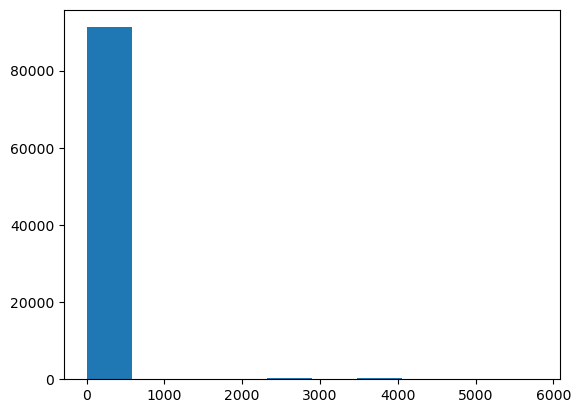

In [84]:
plt.hist(df['Interest_Rate'])
plt.show() 

In [85]:
df[df['Interest_Rate']>1000]

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,New_Age
44,CUS_0x95ee,31,Lawyer,73928.46,5988.705000,4,5,5318,0,11.0,7,10.14,2.0,Good,548.20,26.333310,32,No,0.000000,177.951836,Low_spent_Large_value_payments,690.918664,Good,31.0
167,CUS_0x132f,41,Musician,19514.88,4270.046382,7,5,5240,0,26.0,11,4.17,4.0,Bad,881.40,28.781888,19,No,0.000000,99.141541,High_spent_Small_value_payments,343.682459,Poor,41.0
178,CUS_0xac86,20,Entrepreneur,106733.13,8873.427500,4,4,4975,0,2.0,6,0.86,0.0,Good,76.23,42.070459,32,No,0.000000,172.032829,High_spent_Large_value_payments,955.309921,Good,20.0
472,CUS_0x8f17,45,Journalist,41746.76,3651.896667,8,5,5261,3,62.0,21,9.81,8.0,Bad,1936.79,37.705261,19,Yes,102.283398,425.103822,Low_spent_Small_value_payments,127.802447,Poor,45.0
514,CUS_0xab76,26,Scientist,60162.10,5197.508333,5,7,2607,-100,18.0,10,18.79,7.0,Standard,1037.45,30.914389,13,Yes,220.213727,184.553149,High_spent_Medium_value_payments,364.983958,Standard,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99621,CUS_0xae66,31,Writer,142560.36,11773.030000,6,3,2536,1,23.0,15,11.22,0.0,Standard,220.75,29.226150,17,No,76.772094,287.788187,High_spent_Large_value_payments,1052.742719,Standard,31.0
99753,CUS_0x4a8f,24,Engineer,34493.92,4252.244204,9,10,1127,7,25.0,17,25.16,13.0,Bad,4138.67,38.298229,10,Yes,110.383098,590.548791,High_spent_Small_value_payments,346.941270,Poor,24.0
99791,CUS_0x62f5,54,Musician,99520.50,8479.375000,3,1,4396,3,8.0,5,4.08,5.0,Good,547.21,38.798114,16,No,196.528591,147.563516,Low_spent_Small_value_payments,743.845393,Good,54.0
99882,CUS_0x47fa,31,Mechanic,16884797.00,5440.945000,7,3,1947,0,7.0,8,12.57,2.0,Standard,330.60,38.524095,23,Yes,0.000000,10000.000000,High_spent_Small_value_payments,536.342920,Standard,31.0


In [86]:
df = df[~(df['Interest_Rate'] > 1000)]

In [87]:
df

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,New_Age
0,CUS_0xd40,23,Scientist,19114.12,1824.843333,3,4,3,4,3.000000,7,11.27000,4.0,Good,809.98,26.822620,22,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,23.000000
1,CUS_0xd40,23,Scientist,19114.12,4267.133667,3,4,3,4,10.828755,26,11.27000,4.0,Good,809.98,31.944960,23,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,23.000000
2,CUS_0xd40,33,Scientist,19114.12,4267.133667,3,4,3,4,3.000000,7,10.59767,4.0,Good,809.98,28.609352,22,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,33.327139
3,CUS_0xd40,23,Scientist,19114.12,4267.133667,3,4,3,4,5.000000,4,6.27000,4.0,Good,809.98,31.377862,22,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,23.000000
4,CUS_0xd40,23,Scientist,19114.12,1824.843333,3,4,3,4,6.000000,26,11.27000,4.0,Good,809.98,24.797347,22,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,23.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,CUS_0x942c,25,Mechanic,39628.99,3359.415833,4,6,7,2,20.000000,6,9.50000,3.0,Bad,502.38,39.323569,31,No,35.104023,140.581403,High_spent_Medium_value_payments,410.256158,Poor,25.000000
99995,CUS_0x942c,25,Mechanic,39628.99,3359.415833,4,6,7,2,23.000000,7,11.50000,3.0,Bad,502.38,34.663572,31,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor,25.000000
99996,CUS_0x942c,25,Mechanic,39628.99,3359.415833,4,6,7,2,18.000000,7,11.50000,3.0,Bad,502.38,40.565631,31,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor,25.000000
99998,CUS_0x942c,25,Mechanic,39628.99,3359.415833,4,6,7,2,20.000000,31,11.50000,3.0,Good,502.38,33.638208,31,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard,25.000000


In [88]:
df.drop(['New_Age'],axis=1,inplace=True)

C:\Users\NOEL SOARES\AppData\Local\Temp\ipykernel_2284\4201946046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['New_Age'],axis=1,inplace=True)


In [89]:
# df.drop(['New_Age'],axis=1,inplace=True)

In [90]:
df

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,23,Scientist,19114.12,1824.843333,3,4,3,4,3.000000,7,11.27000,4.0,Good,809.98,26.822620,22,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,23,Scientist,19114.12,4267.133667,3,4,3,4,10.828755,26,11.27000,4.0,Good,809.98,31.944960,23,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,CUS_0xd40,33,Scientist,19114.12,4267.133667,3,4,3,4,3.000000,7,10.59767,4.0,Good,809.98,28.609352,22,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,CUS_0xd40,23,Scientist,19114.12,4267.133667,3,4,3,4,5.000000,4,6.27000,4.0,Good,809.98,31.377862,22,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,23,Scientist,19114.12,1824.843333,3,4,3,4,6.000000,26,11.27000,4.0,Good,809.98,24.797347,22,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,CUS_0x942c,25,Mechanic,39628.99,3359.415833,4,6,7,2,20.000000,6,9.50000,3.0,Bad,502.38,39.323569,31,No,35.104023,140.581403,High_spent_Medium_value_payments,410.256158,Poor
99995,CUS_0x942c,25,Mechanic,39628.99,3359.415833,4,6,7,2,23.000000,7,11.50000,3.0,Bad,502.38,34.663572,31,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,CUS_0x942c,25,Mechanic,39628.99,3359.415833,4,6,7,2,18.000000,7,11.50000,3.0,Bad,502.38,40.565631,31,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99998,CUS_0x942c,25,Mechanic,39628.99,3359.415833,4,6,7,2,20.000000,31,11.50000,3.0,Good,502.38,33.638208,31,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [91]:
encode=LabelEncoder()

In [92]:
df['Customer_ID']=encode.fit_transform(df['Customer_ID'])
df['Occupation']=encode.fit_transform(df['Occupation'])
df['Credit_Mix']=encode.fit_transform(df['Credit_Mix'])
df['Payment_of_Min_Amount']=encode.fit_transform(df['Payment_of_Min_Amount'])
df['Credit_Score']=encode.fit_transform(df['Credit_Score'])
df['Payment_Behaviour']=encode.fit_transform(df['Payment_Behaviour'])

C:\Users\NOEL SOARES\AppData\Local\Temp\ipykernel_2284\1270492411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer_ID']=encode.fit_transform(df['Customer_ID'])
C:\Users\NOEL SOARES\AppData\Local\Temp\ipykernel_2284\1270492411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation']=encode.fit_transform(df['Occupation'])
C:\Users\NOEL SOARES\AppData\Local\Temp\ipykernel_2284\1270492411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [93]:
df

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,12320,23,12,19114.12,1824.843333,3,4,3,4,3.000000,7,11.27000,4.0,1,809.98,26.822620,22,0,49.574949,80.415295,2,312.494089,0
1,12320,23,12,19114.12,4267.133667,3,4,3,4,10.828755,26,11.27000,4.0,1,809.98,31.944960,23,0,49.574949,118.280222,3,284.629162,0
2,12320,33,12,19114.12,4267.133667,3,4,3,4,3.000000,7,10.59767,4.0,1,809.98,28.609352,22,0,49.574949,81.699521,4,331.209863,0
3,12320,23,12,19114.12,4267.133667,3,4,3,4,5.000000,4,6.27000,4.0,1,809.98,31.377862,22,0,49.574949,199.458074,5,223.451310,0
4,12320,23,12,19114.12,1824.843333,3,4,3,4,6.000000,26,11.27000,4.0,1,809.98,24.797347,22,0,49.574949,41.420153,1,341.489231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,8833,25,9,39628.99,3359.415833,4,6,7,2,20.000000,6,9.50000,3.0,0,502.38,39.323569,31,0,35.104023,140.581403,1,410.256158,1
99995,8833,25,9,39628.99,3359.415833,4,6,7,2,23.000000,7,11.50000,3.0,0,502.38,34.663572,31,0,35.104023,60.971333,0,479.866228,1
99996,8833,25,9,39628.99,3359.415833,4,6,7,2,18.000000,7,11.50000,3.0,0,502.38,40.565631,31,0,35.104023,54.185950,1,496.651610,1
99998,8833,25,9,39628.99,3359.415833,4,6,7,2,20.000000,31,11.50000,3.0,1,502.38,33.638208,31,0,35.104023,251.672582,3,319.164979,2


In [94]:
# sns.pairplot(df,hue="Credit_Score",kind='kde')

## Model

In [95]:
# pip install xgboost

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [97]:
X=df.drop(['Credit_Score'],axis=1)
y=df['Credit_Score']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [99]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(73084, 22)
(18271, 22)
(73084,)
(18271,)


In [100]:
minmax=MinMaxScaler()

In [101]:
X_train=minmax.fit_transform(X_train)
X_test=minmax.transform(X_test)

In [102]:
X_train

array([[0.23193856, 0.41975309, 0.5       , ..., 0.01122353, 0.4       ,
        1.        ],
       [0.56796544, 0.09876543, 0.28571429, ..., 0.00491648, 0.2       ,
        1.        ],
       [0.73701896, 0.25925926, 0.64285714, ..., 0.03620457, 0.2       ,
        1.        ],
       ...,
       [0.47771822, 0.27160494, 0.28571429, ..., 0.01710934, 0.2       ,
        1.        ],
       [0.37210977, 0.49382716, 0.57142857, ..., 0.06650311, 0.8       ,
        1.        ],
       [0.39819186, 0.45679012, 0.71428571, ..., 0.0142107 , 1.        ,
        1.        ]])

In [103]:
X_test

array([[0.1136891 , 0.2962963 , 0.21428571, ..., 0.00585184, 1.        ,
        1.        ],
       [0.10976878, 0.4691358 , 0.57142857, ..., 1.        , 1.        ,
        1.        ],
       [0.1637731 , 0.0617284 , 0.14285714, ..., 0.00822771, 1.        ,
        1.        ],
       ...,
       [0.66605328, 0.0617284 , 0.5       , ..., 0.02257105, 0.2       ,
        1.        ],
       [0.95991679, 0.01234568, 0.57142857, ..., 0.0045845 , 0.2       ,
        1.        ],
       [0.13697096, 0.30864198, 0.14285714, ..., 0.08696255, 0.8       ,
        1.        ]])

In [104]:
models={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "SVC":SVC(),
    "XGboost":xgb.XGBClassifier()
}

In [105]:
params={
    "LogisticRegression":{"max_iter":[1000]},
    "DecisionTreeClassifier":{
        "criterion":["gini", "entropy"],
        "max_depth":[2,3,5,7,None]
    },
    "RandomForestClassifier":{
        "criterion":["gini", "entropy"],
        "max_depth":[2,3,5,7,None]
    },
    "SVC":{
        "kernel" : ['linear', 'rbf'],
        "gamma" : ['scale', 'auto']
    },
    "XGboost":{
        "max_depth":[2,3,5,7,None]
    }
}

In [106]:
for model_key,model in models.items():
    print(model_key, model)
    param=params[model_key]
    rand=RandomizedSearchCV(model,param,cv=5,n_jobs=-1,scoring='accuracy')
    rand.fit(X_train,y_train)
    y_pred=rand.predict(X_test)
    print("best params: ",rand.best_params_)
    print("accuracy score: ",accuracy_score(y_test,y_pred))

LogisticRegression LogisticRegression()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


best params:  {'max_iter': 1000}
accuracy score:  0.6915877620272564
DecisionTreeClassifier DecisionTreeClassifier()
best params:  {'max_depth': 7, 'criterion': 'gini'}
accuracy score:  0.7671720212358382
RandomForestClassifier RandomForestClassifier()
best params:  {'max_depth': None, 'criterion': 'gini'}
accuracy score:  0.8411690657325817
SVC SVC()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


best params:  {'kernel': 'rbf', 'gamma': 'scale'}
accuracy score:  0.7162169558316458
XGboost XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


best params:  {'max_depth': 7}
accuracy score:  0.8248590662798971


In [107]:
rf=RandomForestClassifier(criterion='entropy')

In [108]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [109]:
y_pred=rf.predict(X_test)

In [110]:
y_pred

array([1, 0, 1, ..., 2, 2, 1])

In [111]:
accuracy_score(y_test,y_pred)

0.8388156094357178

In [112]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[2673   17  537]
 [  91 4543  755]
 [ 633  912 8110]]


<Axes: >

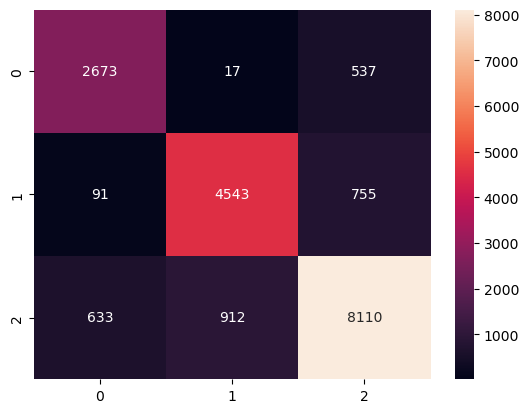

In [113]:
sns.heatmap(cm,annot=True,fmt='d')

In [114]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      3227
           1       0.83      0.84      0.84      5389
           2       0.86      0.84      0.85      9655

    accuracy                           0.84     18271
   macro avg       0.83      0.84      0.83     18271
weighted avg       0.84      0.84      0.84     18271



### Code to habdle imbalance data set
- Oversampling
- Undersampling

In [115]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_classification
# from imblearn.over_sampling import RandomOverSampler
# from collections import Counter

# # Create an imbalanced dataset with 3 classes
# X, y = make_classification(
#     n_samples=1000,
#     n_features=20,
#     n_classes=3,
#     n_clusters_per_class=1,
#     weights=[0.1, 0.3, 0.6],  # Class imbalance
#     random_state=42
# )

# # Print the histogram of the initial classes
# plt.figure(figsize=(10, 6))
# plt.hist(y, bins=range(4), align='left', rwidth=0.8, color='blue', alpha=0.7)
# plt.title("Histogram of Initial Classes")
# plt.xlabel("Class")
# plt.ylabel("Number of Instances")
# plt.xticks(range(3), ['Class 0', 'Class 1', 'Class 2'])
# plt.show()

# # Apply oversampling using RandomOverSampler
# oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
# X_resampled, y_resampled = oversampler.fit_resample(X, y)

# # Print the histogram of the resampled classes
# plt.figure(figsize=(10, 6))
# plt.hist(y_resampled, bins=range(4), align='left', rwidth=0.8, color='orange', alpha=0.7)
# plt.title("Histogram of Resampled Classes (Oversampling)")
# plt.xlabel("Class")
# plt.ylabel("Number of Instances")
# plt.xticks(range(3), ['Class 0', 'Class 1', 'Class 2'])
# plt.show()